<h1>Análise de Dados Enem 2019</h1>

In [1]:
# Versão Python para Este Projeto
from platform import python_version
print(f"Versão Python do Projeto: {python_version()}")

<h1>Carregando e Instalando os Pacotes</h1>

In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [3]:
# pip install -q watermark

In [4]:
# Versão dos pacotes
%reload_ext watermark
%watermark -a "Airton Fabre" --iversions

Author: Airton Fabre

matplotlib: 3.5.2
seaborn   : 0.11.2
numpy     : 1.23.1
pandas    : 1.4.3



In [5]:
# Visualizar todas as colunas
pd.set_option("display.max_columns", None)

In [6]:
%%time
# Carregando o Conjunto de Dados
enem = pd.read_csv("DADOS/MICRODADOS_ENEM_2019.csv", encoding="latin1", sep = ";")
enem.head()

CPU times: total: 1min 27s
Wall time: 3min 17s


,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004627,2019,1506807,Santarém,15,PA,21,M,1,3,4,NaN,NaN,NaN,NaN,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1506807,Santarém,15,PA,1,1,1,1,504.0,509.0,514.0,516.0,472.9,466.0,497.3,369.1,DECCEBAECBDADCDBBACEBECCBECBECDDDCBCAADBEDCDA,CCBCAEDAAECEDABEDAAADEDBBEDACDCDDCBBCCEBBAACB,DBBCB99999BDCCDBBABBAAADCBEBAEBBAAEBCCCABDCCBA...,ADBBDEDCABCEDCACBECDCCEBCCDBEBDCEDDBCDBCCDECC,0,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,160.0,160.0,160.0,140.0,160.0,780.0,D,E,A,A,7,B,A,B,C,A,A,B,A,B,A,A,A,A,C,B,A,D,A,B,A
1,190001004628,2019,1504059,Mãe do Rio,15,PA,16,F,1,3,1,1505502.0,Paragominas,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1504059,Mãe do Rio,15,PA,1,1,1,1,506.0,510.0,513.0,517.0,358.9,495.4,482.3,416.5,DAEDEBDCDEBAAACDADABDACABECDAEAAAADCEBBADEBDE,CEACBBDEEABDDACADDAABCEAEEDEEBCACEDBBDBBDBACE,99999ADBEAEBDACDAADEBBDABAEADCDDACABCCAABEEAEE...,DACCCBDCCCBACCCCEEEBBBEACCAABDBACDCAECABCCDBE,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,120.0,120.0,120.0,120.0,120.0,600.0,D,E,A,A,5,B,A,B,C,A,A,B,A,B,A,A,A,A,B,B,A,B,A,A,A
2,190001004629,2019,1505502,Paragominas,15,PA,18,F,1,1,1,1505502.0,Paragominas,15.0,PA,2,0,3,1.0,0,15230023.0,1505502.0,Paragominas,15.0,PA,4.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1505502,Paragominas,15,PA,1,1,1,1,505.0,510.0,513.0,518.0,574.2,538.7,582.6,571.5,AABDAECAECECCBCBDECCCBCDBBABABADACBDEADEDABEE,ABACCEABCDADABACBBCEACDACDBBEEBACABBAEACAADCE,ADBBC99999EDBCBBAACECCDCDAACECAABCDCCEDEBAECEA...,DECCABCBCDBBBEAECBDBBCDDAADEBCBCACBBEDADDEEAC,0,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,EEBCEEDBADBBCBABCCADCE

<h1> Análise Exploratória </h1>

In [7]:
# Shape
enem.shape

(5095270, 136)

In [8]:
# Info
enem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5095270 entries, 0 to 5095269
Columns: 136 entries, NU_INSCRICAO to Q025
dtypes: float64(24), int64(71), object(41)
memory usage: 5.2+ GB


In [9]:
# Variáveis com valores ausentes
for col in enem.columns:
    if enem[col].isnull().any():
        print(f"A Variável {col} tem: {enem[col].isnull().sum()} valores ausentes.")
        print(f"Isso representa {round(enem[col].isnull().sum() / len(enem), 2)}% de valores ausentes.")
        print("-" * 55)
    else:
        pass

A Variável CO_MUNICIPIO_NASCIMENTO tem: 145249 valores ausentes.
Isso representa 0.03% de valores ausentes.
-------------------------------------------------------
A Variável NO_MUNICIPIO_NASCIMENTO tem: 145249 valores ausentes.
Isso representa 0.03% de valores ausentes.
-------------------------------------------------------
A Variável CO_UF_NASCIMENTO tem: 145249 valores ausentes.
Isso representa 0.03% de valores ausentes.
-------------------------------------------------------
A Variável SG_UF_NASCIMENTO tem: 145249 valores ausentes.
Isso representa 0.03% de valores ausentes.
-------------------------------------------------------
A Variável TP_ENSINO tem: 2217073 valores ausentes.
Isso representa 0.44% de valores ausentes.
-------------------------------------------------------
A Variável CO_ESCOLA tem: 3947858 valores ausentes.
Isso representa 0.77% de valores ausentes.
-------------------------------------------------------
A Variável CO_MUNICIPIO_ESC tem: 3947858 valores ausente

In [10]:
# Nº de registros únicos por variável
for col in enem.columns:
    if enem[col].nunique() < 6:
        print(f"A Variável {col} tem {enem[col].nunique()} valores únicos.")
        print(f"Sendo eles {enem[col].unique()}")
        print("-" * 55)
    else:
        print(f"A Variável {col} tem {enem[col].nunique()} valores únicos.")
        print("-" * 55)

A Variável NU_INSCRICAO tem 5095270 valores únicos.
-------------------------------------------------------
A Variável NU_ANO tem 1 valores únicos.
Sendo eles [2019]
-------------------------------------------------------
A Variável CO_MUNICIPIO_RESIDENCIA tem 5570 valores únicos.
-------------------------------------------------------
A Variável NO_MUNICIPIO_RESIDENCIA tem 5299 valores únicos.
-------------------------------------------------------
A Variável CO_UF_RESIDENCIA tem 27 valores únicos.
-------------------------------------------------------
A Variável SG_UF_RESIDENCIA tem 27 valores únicos.
-------------------------------------------------------
A Variável NU_IDADE tem 91 valores únicos.
-------------------------------------------------------
A Variável TP_SEXO tem 2 valores únicos.
Sendo eles ['M' 'F']
-------------------------------------------------------
A Variável TP_ESTADO_CIVIL tem 5 valores únicos.
Sendo eles [1 0 2 3 4]
-------------------------------------------

A Variável IN_MARCA_PASSO tem 2 valores únicos.
Sendo eles [0 1]
-------------------------------------------------------
A Variável IN_SONDA tem 2 valores únicos.
Sendo eles [0 1]
-------------------------------------------------------
A Variável IN_MEDICAMENTOS tem 2 valores únicos.
Sendo eles [0 1]
-------------------------------------------------------
A Variável IN_SALA_INDIVIDUAL tem 2 valores únicos.
Sendo eles [0 1]
-------------------------------------------------------
A Variável IN_SALA_ESPECIAL tem 2 valores únicos.
Sendo eles [0 1]
-------------------------------------------------------
A Variável IN_SALA_ACOMPANHANTE tem 2 valores únicos.
Sendo eles [0 1]
-------------------------------------------------------
A Variável IN_MOBILIARIO_ESPECIFICO tem 2 valores únicos.
Sendo eles [0 1]
-------------------------------------------------------
A Variável IN_MATERIAL_ESPECIFICO tem 2 valores únicos.
Sendo eles [0 1]
-------------------------------------------------------
A Variá

In [11]:
# Validando se o Cód de município corresponde sempre à mesma cidade
enem[enem["CO_MUNICIPIO_RESIDENCIA"] == 1506807].head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004627,2019,1506807,Santarém,15,PA,21,M,1,3,4,NaN,NaN,NaN,NaN,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1506807,Santarém,15,PA,1,1,1,1,504.0,509.0,514.0,516.0,472.9,466.0,497.3,369.1,DECCEBAECBDADCDBBACEBECCBECBECDDDCBCAADBEDCDA,CCBCAEDAAECEDABEDAAADEDBBEDACDCDDCBBCCEBBAACB,DBBCB99999BDCCDBBABBAAADCBEBAEBBAAEBCCCABDCCBA...,ADBBDEDCABCEDCACBECDCCEBCCDBEBDCEDDBCDBCCDECC,0,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,160.0,160.0,160.0,140.0,160.0,780.0,D,E,A,A,7,B,A,B,C,A,A,B,A,B,A,A,A,A,C,B,A,D,A,B,A
72,190001004699,2019,1506807,Santarém,15,PA,22,F,1,3,1,1600105.0,Amapá,16.0,AP,1,4,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1506807,Santarém,15,PA,1,1,1,1,503.0,508.0,512.0,515.0,397.6,518.6,489.3,366.9,CDDDBEDDBCDCADBADBECACEBCEADDBCBEBECBCAEDCDED,BBAACBDACDDEDDBDECBAADDBBBCBDABCADCECEEACAEAC,99999CEDADCEBDAEBCDCAADACDDDBEEBABDEBDBDECBACE...,CBCECBADDCBEDAADDDBCCDADADDBCCBEACDBDCECDCBDB,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,80.0,120.0,120.0,120.0,60.0,500.0,B,E,F,F,7,A,A,B,D,A,A,B,A,B,A,A,A,A,B,A,A,C,A,A,A
82,190001004709,2019,1506807,Santarém,15,PA,26,M,1,3,1,1506807.0,Santarém,15.0,PA,1,8,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1506807,Santarém,15,PA,1,1,1,1,505.0,509.0,514.0,518.0,508.2,520.0,567.0,472.1,CCBCEDBCCBECEDCBDEADACBCBEEDDBDABCEBEDEEBEAEE,ACECAECCEAAEBDEEAACABBEBCACBDCCDECBBDBBADABAD,EBCAB99999BCCCCDEDEBEECDBDEBAECECADBBBCAAECACC...,EBBCADCECDEBEECECBEADEBBADABCDBCBEDCDACBCDCBE,0,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCE

In [12]:
# Validando se o Cód de UF corresponde à sigla
enem[enem["CO_UF_RESIDENCIA"] == 15].head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004627,2019,1506807,Santarém,15,PA,21,M,1,3,4,NaN,NaN,NaN,NaN,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1506807,Santarém,15,PA,1,1,1,1,504.0,509.0,514.0,516.0,472.9,466.0,497.3,369.1,DECCEBAECBDADCDBBACEBECCBECBECDDDCBCAADBEDCDA,CCBCAEDAAECEDABEDAAADEDBBEDACDCDDCBBCCEBBAACB,DBBCB99999BDCCDBBABBAAADCBEBAEBBAAEBCCCABDCCBA...,ADBBDEDCABCEDCACBECDCCEBCCDBEBDCEDDBCDBCCDECC,0,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,160.0,160.0,160.0,140.0,160.0,780.0,D,E,A,A,7,B,A,B,C,A,A,B,A,B,A,A,A,A,C,B,A,D,A,B,A
1,190001004628,2019,1504059,Mãe do Rio,15,PA,16,F,1,3,1,1505502.0,Paragominas,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1504059,Mãe do Rio,15,PA,1,1,1,1,506.0,510.0,513.0,517.0,358.9,495.4,482.3,416.5,DAEDEBDCDEBAAACDADABDACABECDAEAAAADCEBBADEBDE,CEACBBDEEABDDACADDAABCEAEEDEEBCACEDBBDBBDBACE,99999ADBEAEBDACDAADEBBDABAEADCDDACABCCAABEEAEE...,DACCCBDCCCBACCCCEEEBBBEACCAABDBACDCAECABCCDBE,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,120.0,120.0,120.0,120.0,120.0,600.0,D,E,A,A,5,B,A,B,C,A,A,B,A,B,A,A,A,A,B,B,A,B,A,A,A
2,190001004629,2019,1505502,Paragominas,15,PA,18,F,1,1,1,1505502.0,Paragominas,15.0,PA,2,0,3,1.0,0,15230023.0,1505502.0,Paragominas,15.0,PA,4.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1505502,Paragominas,15,PA,1,1,1,1,505.0,510.0,513.0,518.0,574.2,538.7,582.6,571.5,AABDAECAECECCBCBDECCCBCDBBABABADACBDEADEDABEE,ABACCEABCDADABACBBCEACDACDBBEEBACABBAEACAADCE,ADBBC99999EDBCBBAACECCDCDAACECAABCDCCEDEBAECEA...,DECCABCBCDBBBEAECBDBBCDDAADEBCBCACBBEDADDEEAC,0,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,EEBCEEDBADBBCBABCCADCE

In [13]:
# Verificando se existem valores ausentes
enem["NO_MUNICIPIO_RESIDENCIA"].isnull().sum()

0

In [14]:
enem["CO_MUNICIPIO_RESIDENCIA"].isnull().sum()

0

In [15]:
enem["CO_UF_RESIDENCIA"].isnull().sum()

0

In [16]:
enem["SG_UF_RESIDENCIA"].isnull().sum()

0

In [17]:
# Verificando se existem valores duplicados
enem["NU_INSCRICAO"].duplicated().sum()

0

<p>Não há necessidade de manter as variáveis com o código de município e UF pois ja temos essas informações em outras variáveis, como não existem valores ausentes vamos remover as variáveis de código município e UF.</p>

In [18]:
# Removendo a variável com o cód do município de residência
enem.drop(columns=(["NU_INSCRICAO",
                    "CO_MUNICIPIO_RESIDENCIA",
                    "CO_UF_RESIDENCIA"]), axis = 1, inplace = True)

In [19]:
enem.shape

(5095270, 133)

In [20]:
# Valores ausentes em relação à cidade de nascimento 
nascimento = enem[["CO_MUNICIPIO_NASCIMENTO",
                   "NO_MUNICIPIO_NASCIMENTO",
                   "CO_UF_NASCIMENTO",
                   "SG_UF_NASCIMENTO"]].isnull().sum()

In [21]:
nascimento

CO_MUNICIPIO_NASCIMENTO    145249
NO_MUNICIPIO_NASCIMENTO    145249
CO_UF_NASCIMENTO           145249
SG_UF_NASCIMENTO           145249
dtype: int64

<p> As variáveis <i>CO_MUNICIPIO_NASCIMENTO, NO_MUNICIPIO_NASCIMENTO, CO_UF_NASCIMENTO e SG_UF_NASCIMENTO</i> possuem <b>145249</b> valores ausentes, não há como relacionar essas variáveis à outras com o intuinto de realizar uma imputação, uma vez que a cidade de nascimento não necessariamente tem relação com a de residência, portanto, como não há outra forma de tratar esses valores ausentes e eles correspondem a uma pequena porcentagem do nosso conjunto de dados <i>(3%)</i> irei remover os registros.</p>

In [22]:
enem.columns

Index(['NU_ANO', 'NO_MUNICIPIO_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'CO_MUNICIPIO_NASCIMENTO', 'NO_MUNICIPIO_NASCIMENTO',
       ...
       'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024',
       'Q025'],
      dtype='object', length=133)

In [23]:
# Removendo os valores ausentes 
enem.dropna(subset = ["CO_MUNICIPIO_NASCIMENTO",
                      "NO_MUNICIPIO_NASCIMENTO",
                      "CO_UF_NASCIMENTO",
                      "SG_UF_NASCIMENTO"], how = "any",  axis = 0, inplace = True)

In [24]:
enem.shape

(4950021, 133)

In [25]:
# Verifricando se existem valores ausentes
enem[["CO_MUNICIPIO_NASCIMENTO",
       "NO_MUNICIPIO_NASCIMENTO",
       "CO_UF_NASCIMENTO",
       "SG_UF_NASCIMENTO"]].isnull().sum()

CO_MUNICIPIO_NASCIMENTO    0
NO_MUNICIPIO_NASCIMENTO    0
CO_UF_NASCIMENTO           0
SG_UF_NASCIMENTO           0
dtype: int64

In [26]:
enem.head()

,NU_ANO,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
1,2019,Mãe do Rio,PA,16,F,1,3,1,1505502.0,Paragominas,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1504059,Mãe do Rio,15,PA,1,1,1,1,506.0,510.0,513.0,517.0,358.9,495.4,482.3,416.5,DAEDEBDCDEBAAACDADABDACABECDAEAAAADCEBBADEBDE,CEACBBDEEABDDACADDAABCEAEEDEEBCACEDBBDBBDBACE,99999ADBEAEBDACDAADEBBDABAEADCDDACABCCAABEEAEE...,DACCCBDCCCBACCCCEEEBBBEACCAABDBACDCAECABCCDBE,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,120.0,120.0,120.0,120.0,120.0,600.0,D,E,A,A,5,B,A,B,C,A,A,B,A,B,A,A,A,A,B,B,A,B,A,A,A
2,2019,Paragominas,PA,18,F,1,1,1,1505502.0,Paragominas,15.0,PA,2,0,3,1.0,0,15230023.0,1505502.0,Paragominas,15.0,PA,4.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1505502,Paragominas,15,PA,1,1,1,1,505.0,510.0,513.0,518.0,574.2,538.7,582.6,571.5,AABDAECAECECCBCBDECCCBCDBBABABADACBDEADEDABEE,ABACCEABCDADABACBBCEACDACDBBEEBACABBAEACAADCE,ADBBC99999EDBCBBAACECCDCDAACECAABCDCCEDEBAECEA...,DECCABCBCDBBBEAECBDBBCDDAADEBCBCACBBEDADDEEAC,0,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,140.0,120.0,120.0,140.0,120.0,640.0,H,E,A,D,3,C,D,E,E,C,A,B,C,B,A,B,A,A,D,B,B,D,A,C,B
3,2019,São Sebastião da Boa Vista,PA,23,M,0,3,1,1501402.0,Belém,15.0,PA,2,0,2,1.0,0,15027635.0,1507706.0,São Sebastião da Boa Vista,15.0,PA,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1507706,São Sebastião da Boa Vista,15,PA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,D,A,B,3,C,A,B,C,A,A,B,A,A,A,A,A,A,C,A,A,D,A,A,A
4,2019,Juruti,PA,23,M,1,3,1,1503903.0,Juruti,15.0,PA,1,5,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1503903,J

In [27]:
# Verificando novamente valores ausentes
for col in enem.columns:
    if enem[col].isnull().any():
        print(f"A Variável {col} tem: {enem[col].isnull().sum()} valores ausentes.")
        print(f"Isso representa {round(enem[col].isnull().sum() / len(enem), 2)}% de valores ausentes.")
        print("-" * 55)
    else:
        pass

A Variável TP_ENSINO tem: 2157957 valores ausentes.
Isso representa 0.44% de valores ausentes.
-------------------------------------------------------
A Variável CO_ESCOLA tem: 3838851 valores ausentes.
Isso representa 0.78% de valores ausentes.
-------------------------------------------------------
A Variável CO_MUNICIPIO_ESC tem: 3838851 valores ausentes.
Isso representa 0.78% de valores ausentes.
-------------------------------------------------------
A Variável NO_MUNICIPIO_ESC tem: 3838851 valores ausentes.
Isso representa 0.78% de valores ausentes.
-------------------------------------------------------
A Variável CO_UF_ESC tem: 3838851 valores ausentes.
Isso representa 0.78% de valores ausentes.
-------------------------------------------------------
A Variável SG_UF_ESC tem: 3838851 valores ausentes.
Isso representa 0.78% de valores ausentes.
-------------------------------------------------------
A Variável TP_DEPENDENCIA_ADM_ESC tem: 3838851 valores ausentes.
Isso representa

<p> As variáveis <i>CO_ESCOLA, CO_MUNICIPIO_ESC, NO_MUNICIPIO_ESC, CO_UF_ESC e SG_UF_ESC</i>, possuem mais de 70% de valores ausentes, não há como saber o nome do município, no entanto, baseado na variável <b>SG_UF_RESIDENCIA</b>, é possível saber o estado em que o candidato provavelmente fez a prova, uma vez que não faz sentido ele ir para outro estado somente para realizar a prova, portanto poderiamos fazer uma imputação na variável <b>SG_UF_ESC</b> baseado na sigla de residência do candidato e remover as demais variáveis.<p>
<p>No entanto, temos as variáveis <i>CO_MUNICIPIO_PROVA	NO_MUNICIPIO_PROVA	CO_UF_PROVA	SG_UF_PROVA</i> que contém exatamente a mesma informação das variáveis acima, portanto irei remover as variáveis com valores ausentes e manter as variáveis CO_MUNICIPIO_PROVA	NO_MUNICIPIO_PROVA	CO_UF_PROVA	SG_UF_PROVA.</p>

In [28]:
enem[enem["SG_UF_RESIDENCIA"] == "PA"].tail()

,NU_ANO,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
5094694,2019,Belém,PA,42,F,2,2,1,1501402.0,Belém,15.0,PA,1,13,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1501402,Belém,15,PA,1,1,1,1,505.0,507.0,511.0,518.0,407.9,487.6,466.5,467.7,EBEDBACDACBDDDCAABADEADCEAACABBCDBECDAECABCCC,ACBEABAABEEEACCCECEBDAAAEEBAEABCBDBCAABEEBEAB,AEDEA99999EADBBDDABEAADBCBEECEABDDEABBDABDABDD...,DBACBBDBAABBCDEEDAEBAAEBEDAEEDAADBCDBADDEDECD,0,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,120.0,120.0,120.0,100.0,100.0,560.0,B,B,C,B,4,B,A,B,B,A,A,B,A,A,A,A,A,A,B,B,A,B,A,A,B
5094695,2019,Abaetetuba,PA,21,M,1,2,1,1500107.0,Abaetetuba,15.0,PA,1,1,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1500107,Abaetetuba,15,PA,0,1,1,0,NaN,508.0,512.0,NaN,NaN,536.7,547.5,NaN,NaN,AAADCAABCABEACDBACBCADDBBAEDEACDAEDAAEBABAC.C,DCADA99999CEDAEEAEECCEDCABCBABEDEDBAADCDECABCA...,NaN,0,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,100.0,120.0,100.0,120.0,80.0,520.0,B,B,A,A,6,B,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A
5094696,2019,Capanema,PA,22,M,1,3,1,1502301.0,Capitão Poço,15.0,PA,2,0,2,1.0,0,15059731.0,1502202.0,Capanema,15.0,PA,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1502202,Capanema,15,PA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,D,C,B,4,C,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A
5094697,2019,Belém,PA,35,M,1,2,1,1501402.0,Belém,15.0,PA,2,0,2,NaN,0,15040143.0,1501402.0,Belém,15.0,PA,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1501402,Belém,15,PA,1,1,1,1,506.0,507.0,511.0,517.0,400.6,448.1,458.7,397.4,DEDDABDECEDBADAAEEECDADEDEEADCEEDBECEDACBECAD,CEBDAAACCBACDBECEACACBBDACEBDBACCECBEACEACECC,ABECE99999BBECEADBCEDAC*BECACEDBAECDADCACEBDBE...,EDDCADEBDECAEBAEC

In [29]:
enem[["CO_MUNICIPIO_PROVA",
      "NO_MUNICIPIO_PROVA",
      "CO_UF_PROVA",
      "SG_UF_PROVA"]].isnull().sum()

CO_MUNICIPIO_PROVA    0
NO_MUNICIPIO_PROVA    0
CO_UF_PROVA           0
SG_UF_PROVA           0
dtype: int64

In [30]:
# Removendo as variáveis CO_ESCOLA, CO_MUNICIPIO_ESC, 
# NO_MUNICIPIO_ESC, CO_UF_ESC, CO_UF_PROVA, CO_ESCOLA

enem.drop(columns=(["CO_ESCOLA",
                    "CO_MUNICIPIO_ESC",
                    "NO_MUNICIPIO_ESC",
                    "CO_UF_ESC",
                    "SG_UF_ESC",
                    "CO_MUNICIPIO_PROVA",
                    "CO_UF_PROVA",
                    "CO_UF_NASCIMENTO"]), axis = 1, inplace = True)

In [31]:
# Criando uma cópia do conjunto de dados
enem_copy = enem.copy()

In [32]:
enem_copy.shape

(4950021, 126)

In [33]:
# Verificando se existem valores ausentes na variável com a sigla de residência
enem_copy["SG_UF_RESIDENCIA"].isnull().sum()

0

In [34]:
# Verificando valores ausentes
enem_copy["SG_UF_PROVA"].isnull().sum()

0

In [35]:
enem_copy.head()

,NU_ANO,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,NO_MUNICIPIO_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
1,2019,Mãe do Rio,PA,16,F,1,3,1,1505502.0,Paragominas,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Mãe do Rio,PA,1,1,1,1,506.0,510.0,513.0,517.0,358.9,495.4,482.3,416.5,DAEDEBDCDEBAAACDADABDACABECDAEAAAADCEBBADEBDE,CEACBBDEEABDDACADDAABCEAEEDEEBCACEDBBDBBDBACE,99999ADBEAEBDACDAADEBBDABAEADCDDACABCCAABEEAEE...,DACCCBDCCCBACCCCEEEBBBEACCAABDBACDCAECABCCDBE,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,120.0,120.0,120.0,120.0,120.0,600.0,D,E,A,A,5,B,A,B,C,A,A,B,A,B,A,A,A,A,B,B,A,B,A,A,A
2,2019,Paragominas,PA,18,F,1,1,1,1505502.0,Paragominas,15.0,PA,2,0,3,1.0,0,4.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Paragominas,PA,1,1,1,1,505.0,510.0,513.0,518.0,574.2,538.7,582.6,571.5,AABDAECAECECCBCBDECCCBCDBBABABADACBDEADEDABEE,ABACCEABCDADABACBBCEACDACDBBEEBACABBAEACAADCE,ADBBC99999EDBCBBAACECCDCDAACECAABCDCCEDEBAECEA...,DECCABCBCDBBBEAECBDBBCDDAADEBCBCACBBEDADDEEAC,0,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,140.0,120.0,120.0,140.0,120.0,640.0,H,E,A,D,3,C,D,E,E,C,A,B,C,B,A,B,A,A,D,B,B,D,A,C,B
3,2019,São Sebastião da Boa Vista,PA,23,M,0,3,1,1501402.0,Belém,15.0,PA,2,0,2,1.0,0,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,São Sebastião da Boa Vista,PA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,D,A,B,3,C,A,B,C,A,A,B,A,A,A,A,A,A,C,A,A,D,A,A,A
4,2019,Juruti,PA,23,M,1,3,1,1503903.0,Juruti,15.0,PA,1,5,1,1.0,0,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Juruti,PA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,A,A,5,C,A,C,B,A,B,B,A,B,A,A,A,A,B,A,A,D,A,A,A
5,2019,Ananindeua,PA,31,M,1,1,1,1501402.0,Belém,15.0,PA,1,7,1,1.0,0,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [36]:
# Verificando novamente valores ausentes
for col in enem.columns:
    if enem[col].isnull().any():
        print(f"A Variável {col} tem: {enem[col].isnull().sum()} valores ausentes.")
        print(f"Isso representa {round(enem[col].isnull().sum() / len(enem), 2)}% de valores ausentes.")
        print("-" * 55)
    else:
        pass

A Variável TP_ENSINO tem: 2157957 valores ausentes.
Isso representa 0.44% de valores ausentes.
-------------------------------------------------------
A Variável TP_DEPENDENCIA_ADM_ESC tem: 3838851 valores ausentes.
Isso representa 0.78% de valores ausentes.
-------------------------------------------------------
A Variável TP_LOCALIZACAO_ESC tem: 3838851 valores ausentes.
Isso representa 0.78% de valores ausentes.
-------------------------------------------------------
A Variável TP_SIT_FUNC_ESC tem: 3838851 valores ausentes.
Isso representa 0.78% de valores ausentes.
-------------------------------------------------------
A Variável CO_PROVA_CN tem: 1346098 valores ausentes.
Isso representa 0.27% de valores ausentes.
-------------------------------------------------------
A Variável CO_PROVA_CH tem: 1140080 valores ausentes.
Isso representa 0.23% de valores ausentes.
-------------------------------------------------------
A Variável CO_PROVA_LC tem: 1140080 valores ausentes.
Isso rep

In [39]:
# Variável tipo de ensino
enem_copy["TP_ENSINO"].value_counts(dropna = False)

1.0    2778710
NaN    2157957
2.0      13354
Name: TP_ENSINO, dtype: int64

In [42]:
# Localização da escola
enem_copy["TP_LOCALIZACAO_ESC"].value_counts(dropna = False)

NaN    3838851
1.0    1070868
2.0      40302
Name: TP_LOCALIZACAO_ESC, dtype: int64

In [40]:
enem_copy.shape

(4950021, 126)

In [41]:
enem_copy.head()

,NU_ANO,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,NO_MUNICIPIO_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
1,2019,Mãe do Rio,PA,16,F,1,3,1,1505502.0,Paragominas,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Mãe do Rio,PA,1,1,1,1,506.0,510.0,513.0,517.0,358.9,495.4,482.3,416.5,DAEDEBDCDEBAAACDADABDACABECDAEAAAADCEBBADEBDE,CEACBBDEEABDDACADDAABCEAEEDEEBCACEDBBDBBDBACE,99999ADBEAEBDACDAADEBBDABAEADCDDACABCCAABEEAEE...,DACCCBDCCCBACCCCEEEBBBEACCAABDBACDCAECABCCDBE,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,120.0,120.0,120.0,120.0,120.0,600.0,D,E,A,A,5,B,A,B,C,A,A,B,A,B,A,A,A,A,B,B,A,B,A,A,A
2,2019,Paragominas,PA,18,F,1,1,1,1505502.0,Paragominas,15.0,PA,2,0,3,1.0,0,4.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Paragominas,PA,1,1,1,1,505.0,510.0,513.0,518.0,574.2,538.7,582.6,571.5,AABDAECAECECCBCBDECCCBCDBBABABADACBDEADEDABEE,ABACCEABCDADABACBBCEACDACDBBEEBACABBAEACAADCE,ADBBC99999EDBCBBAACECCDCDAACECAABCDCCEDEBAECEA...,DECCABCBCDBBBEAECBDBBCDDAADEBCBCACBBEDADDEEAC,0,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,140.0,120.0,120.0,140.0,120.0,640.0,H,E,A,D,3,C,D,E,E,C,A,B,C,B,A,B,A,A,D,B,B,D,A,C,B
3,2019,São Sebastião da Boa Vista,PA,23,M,0,3,1,1501402.0,Belém,15.0,PA,2,0,2,1.0,0,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,São Sebastião da Boa Vista,PA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,D,A,B,3,C,A,B,C,A,A,B,A,A,A,A,A,A,C,A,A,D,A,A,A
4,2019,Juruti,PA,23,M,1,3,1,1503903.0,Juruti,15.0,PA,1,5,1,1.0,0,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Juruti,PA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,A,A,5,C,A,C,B,A,B,B,A,B,A,A,A,A,B,A,A,D,A,A,A
5,2019,Ananindeua,PA,31,M,1,1,1,1501402.0,Belém,15.0,PA,1,7,1,1.0,0,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [58]:
answers = enem[["NU_NOTA_COMP1", "NU_NOTA_COMP2", "NU_NOTA_COMP3", "NU_NOTA_COMP4", "NU_NOTA_COMP5", "NU_NOTA_REDACAO"]]

In [59]:
answers.shape

(4950021, 6)

In [61]:
answers.isnull().sum()

NU_NOTA_COMP1      1140081
NU_NOTA_COMP2      1140081
NU_NOTA_COMP3      1140081
NU_NOTA_COMP4      1140081
NU_NOTA_COMP5      1140081
NU_NOTA_REDACAO    1140081
dtype: int64

In [72]:
# Percentual de valores ausentes na variável answers
round(answers.isnull().sum() / len(answers), 2)

NU_NOTA_COMP1      0.23
NU_NOTA_COMP2      0.23
NU_NOTA_COMP3      0.23
NU_NOTA_COMP4      0.23
NU_NOTA_COMP5      0.23
NU_NOTA_REDACAO    0.23
dtype: float64

In [62]:
answers.head()

,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
1,120.0,120.0,120.0,120.0,120.0,600.0
2,140.0,120.0,120.0,140.0,120.0,640.0
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
5,120.0,200.0,140.0,120.0,0.0,580.0


In [67]:
# Notas mínimas
answers.min()

NU_NOTA_COMP1       200.0
NU_NOTA_COMP2       200.0
NU_NOTA_COMP3       200.0
NU_NOTA_COMP4       200.0
NU_NOTA_COMP5       200.0
NU_NOTA_REDACAO    1000.0
dtype: float64

In [68]:
# Notas máximas
answers.max()

NU_NOTA_COMP1       200.0
NU_NOTA_COMP2       200.0
NU_NOTA_COMP3       200.0
NU_NOTA_COMP4       200.0
NU_NOTA_COMP5       200.0
NU_NOTA_REDACAO    1000.0
dtype: float64

In [69]:
# Média de notas
answers.mean()

NU_NOTA_COMP1      120.669003
NU_NOTA_COMP2      122.971758
NU_NOTA_COMP3      115.064988
NU_NOTA_COMP4      121.827751
NU_NOTA_COMP5       91.904408
NU_NOTA_REDACAO    572.437907
dtype: float64

In [70]:
# Mediana
answers.median()

NU_NOTA_COMP1      120.0
NU_NOTA_COMP2      120.0
NU_NOTA_COMP3      120.0
NU_NOTA_COMP4      120.0
NU_NOTA_COMP5      100.0
NU_NOTA_REDACAO    580.0
dtype: float64

<p> Como temos um percentual relativamente alto de valores ausentes, não podemos simplesmente removê-los, nesse caso vamos aplicar <b>engenharia de atributos</b> fazendo uma imputação utilizando a média como referência, o valor da média é muito próximo da mediana, oque indica que não existem valores discrepantes (Outliers) no nosso conjunto de dados, portanto vamos substituir os valores ausentes pela média.</p>

In [73]:
# Aplicando imputação
answers.fillna(value = answers.mean(), axis = 0, inplace = True)

In [74]:
answers.shape

(4950021, 6)

In [75]:
answers.head(10)

,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
1,120.000000,120.000000,120.000000,120.000000,120.000000,600.000000
2,140.000000,120.000000,120.000000,140.000000,120.000000,640.000000
3,120.669003,122.971758,115.064988,121.827751,91.904408,572.437907
4,120.669003,122.971758,115.064988,121.827751,91.904408,572.437907
5,120.000000,200.000000,140.000000,120.000000,0.000000,580.000000
6,80.000000,100.000000,80.000000,80.000000,20.000000,360.000000
7,120.000000,120.000000,120.000000,120.000000,0.000000,480.000000
8,80.000000,120.000000,100.000000,80.000000,80.000000,460.000000
10,160.000000,180.000000,180.000000,200.000000,180.000000,900.000000
11,120.669003,122.971758,115.064988,121.827751,91.904408,572.437907


In [100]:
redacao = answers.groupby("NU_NOTA_REDACAO").count().sort_values(by = "NU_NOTA_COMP1",
                                                                 ascending = False)

In [101]:
redacao.head()

,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5
NU_NOTA_REDACAO,,,,,
572.437907,1140081,1140081,1140081,1140081,1140081
600.000000,269835,269835,269835,269835,269835
560.000000,266728,266728,266728,266728,266728
580.000000,243915,243915,243915,243915,243915
620.000000,200102,200102,200102,200102,200102


51

In [97]:
redacao.max()

NU_NOTA_COMP1    1140081
NU_NOTA_COMP2    1140081
NU_NOTA_COMP3    1140081
NU_NOTA_COMP4    1140081
NU_NOTA_COMP5    1140081
dtype: int64

In [98]:
redacao[redacao["NU_NOTA_COMP1"] == 1140081]

,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5
NU_NOTA_REDACAO,,,,,
572.437907,1140081,1140081,1140081,1140081,1140081


In [162]:
x = [x for x in range(0, 1500, 250)]
x

[0, 250, 500, 750, 1000, 1250]

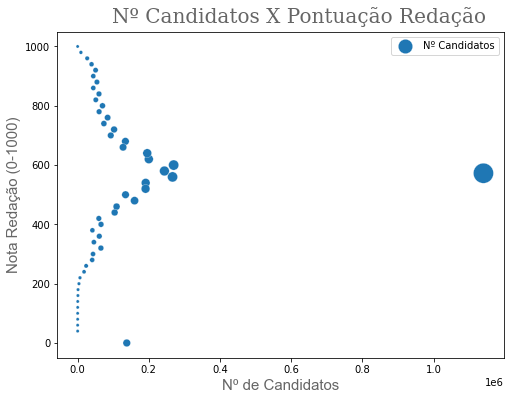

In [172]:
fig, ax = plt.subplots(figsize=(8, 6))

ax = sns.scatterplot(y = redacao.index, x = redacao["NU_NOTA_COMP1"], size = redacao["NU_NOTA_COMP1"],
                    sizes = (10, 400), markers = True)

plt.xlabel("Nº de Candidatos", fontdict={"size": 15,
                                                "fontfamily": "Arial",
                                                "color": "black"},
                                      alpha = 0.6)

plt.ylabel("Nota Redação (0-1000)",
          alpha = 0.6,
          fontdict={"size": 15,
                    "fontfamily": "Arial"})

plt.legend(labels=["Nº Candidatos"], loc = "best")
fig.text(x=0.22,
         y=0.9,
         s="Nº Candidatos X Pontuação Redação",
         alpha = 0.6,
         fontdict={"size": 20,
                   "fontfamily": "serif"})

plt.show()